In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [13]:
df= pd.read_csv('Customer Churn.csv') #df means convert dataframe, pd.read_csv means goning to retrive file 
df.head() #head () it means starting 5 rows it shows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#inspection of data
df.info() # all information of data going to show

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [16]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.isnull().sum().sum()

np.int64(0)

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [28]:
df["customerID"].duplicated().sum()

np.int64(0)

In [30]:
def conv(value):
    if value==1:
        return "yes"0
    else:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)


#converted 0 and 1 values of senior citizen to  yes /no to make it easier to understand

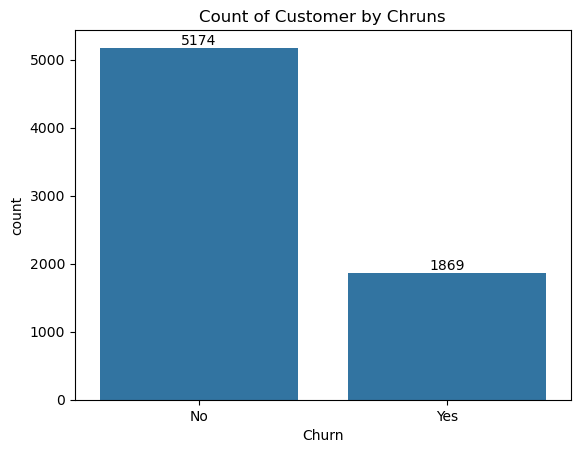

In [55]:
ax= sns.countplot(x= 'Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Chruns")
plt.show()

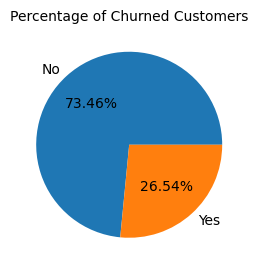

In [59]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.title("Percentage of Churned Customers",fontsize=10)
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.show()


#from the given pie chart we can conclude tht 26.54% of customer have churned out.#not let's explore the 
reason behind it

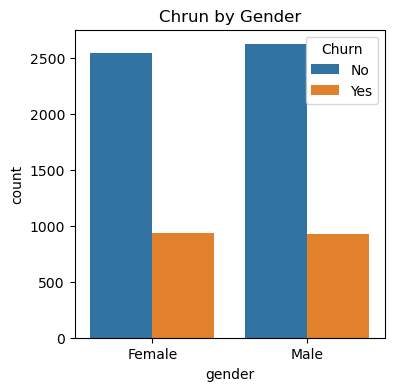

In [70]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data=df,hue="Churn") #hue is a color
plt.title("Chrun by Gender")
plt.show()

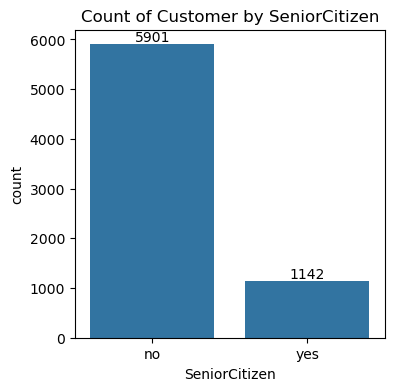

In [80]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x= 'SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitizen")
plt.show()

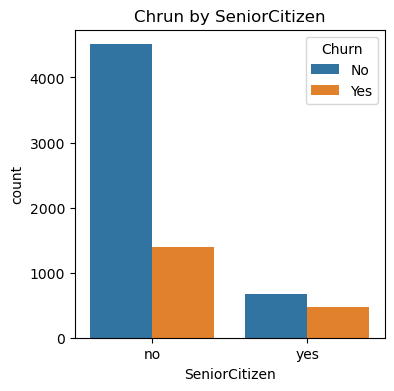

In [84]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen", data=df,hue="Churn") #hue is a color
plt.title("Chrun by SeniorCitizen")
plt.show()

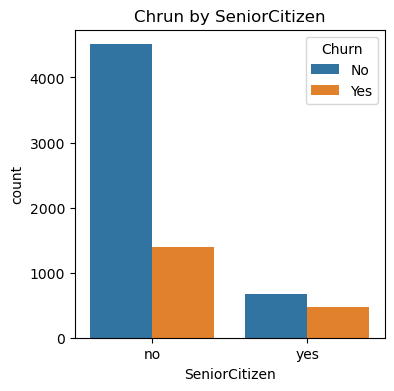

In [82]:

# Count values
count_df = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert to percentage
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

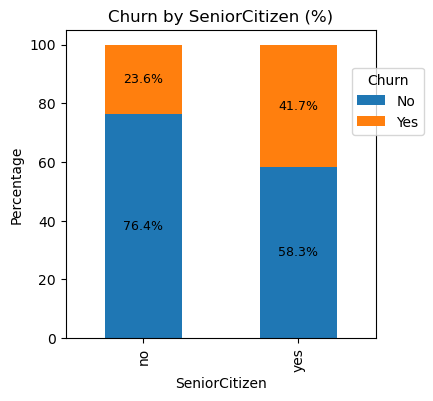

In [85]:
plt.figure(figsize=(4,4))

percent_df.plot(
    kind='bar',
    stacked=True,
    ax=plt.gca()
)

plt.title("Churn by SeniorCitizen (%)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn" , bbox_to_anchor=(0.9,0.9))
for i, row in enumerate(percent_df.values):
    cumulative = 0
    for value in row:
        plt.text(
            i,
            cumulative + value / 2,
            f"{value:.1f}%",
            ha='center',
            va='center',
            fontsize=9
        )
        cumulative += value

#comparative a greater percentage of people in senior citizen category have churned

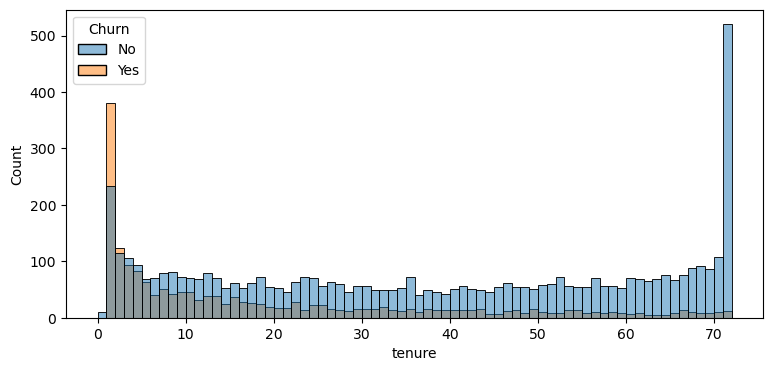

In [27]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df ,bins=72, hue="Churn")
plt.show()

#people who have use are service for a long time have stayed and people who have used our service #1 or 2 months
have churned

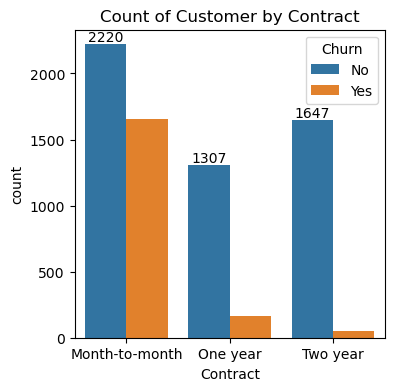

In [30]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x= 'Contract', data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract

In [34]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

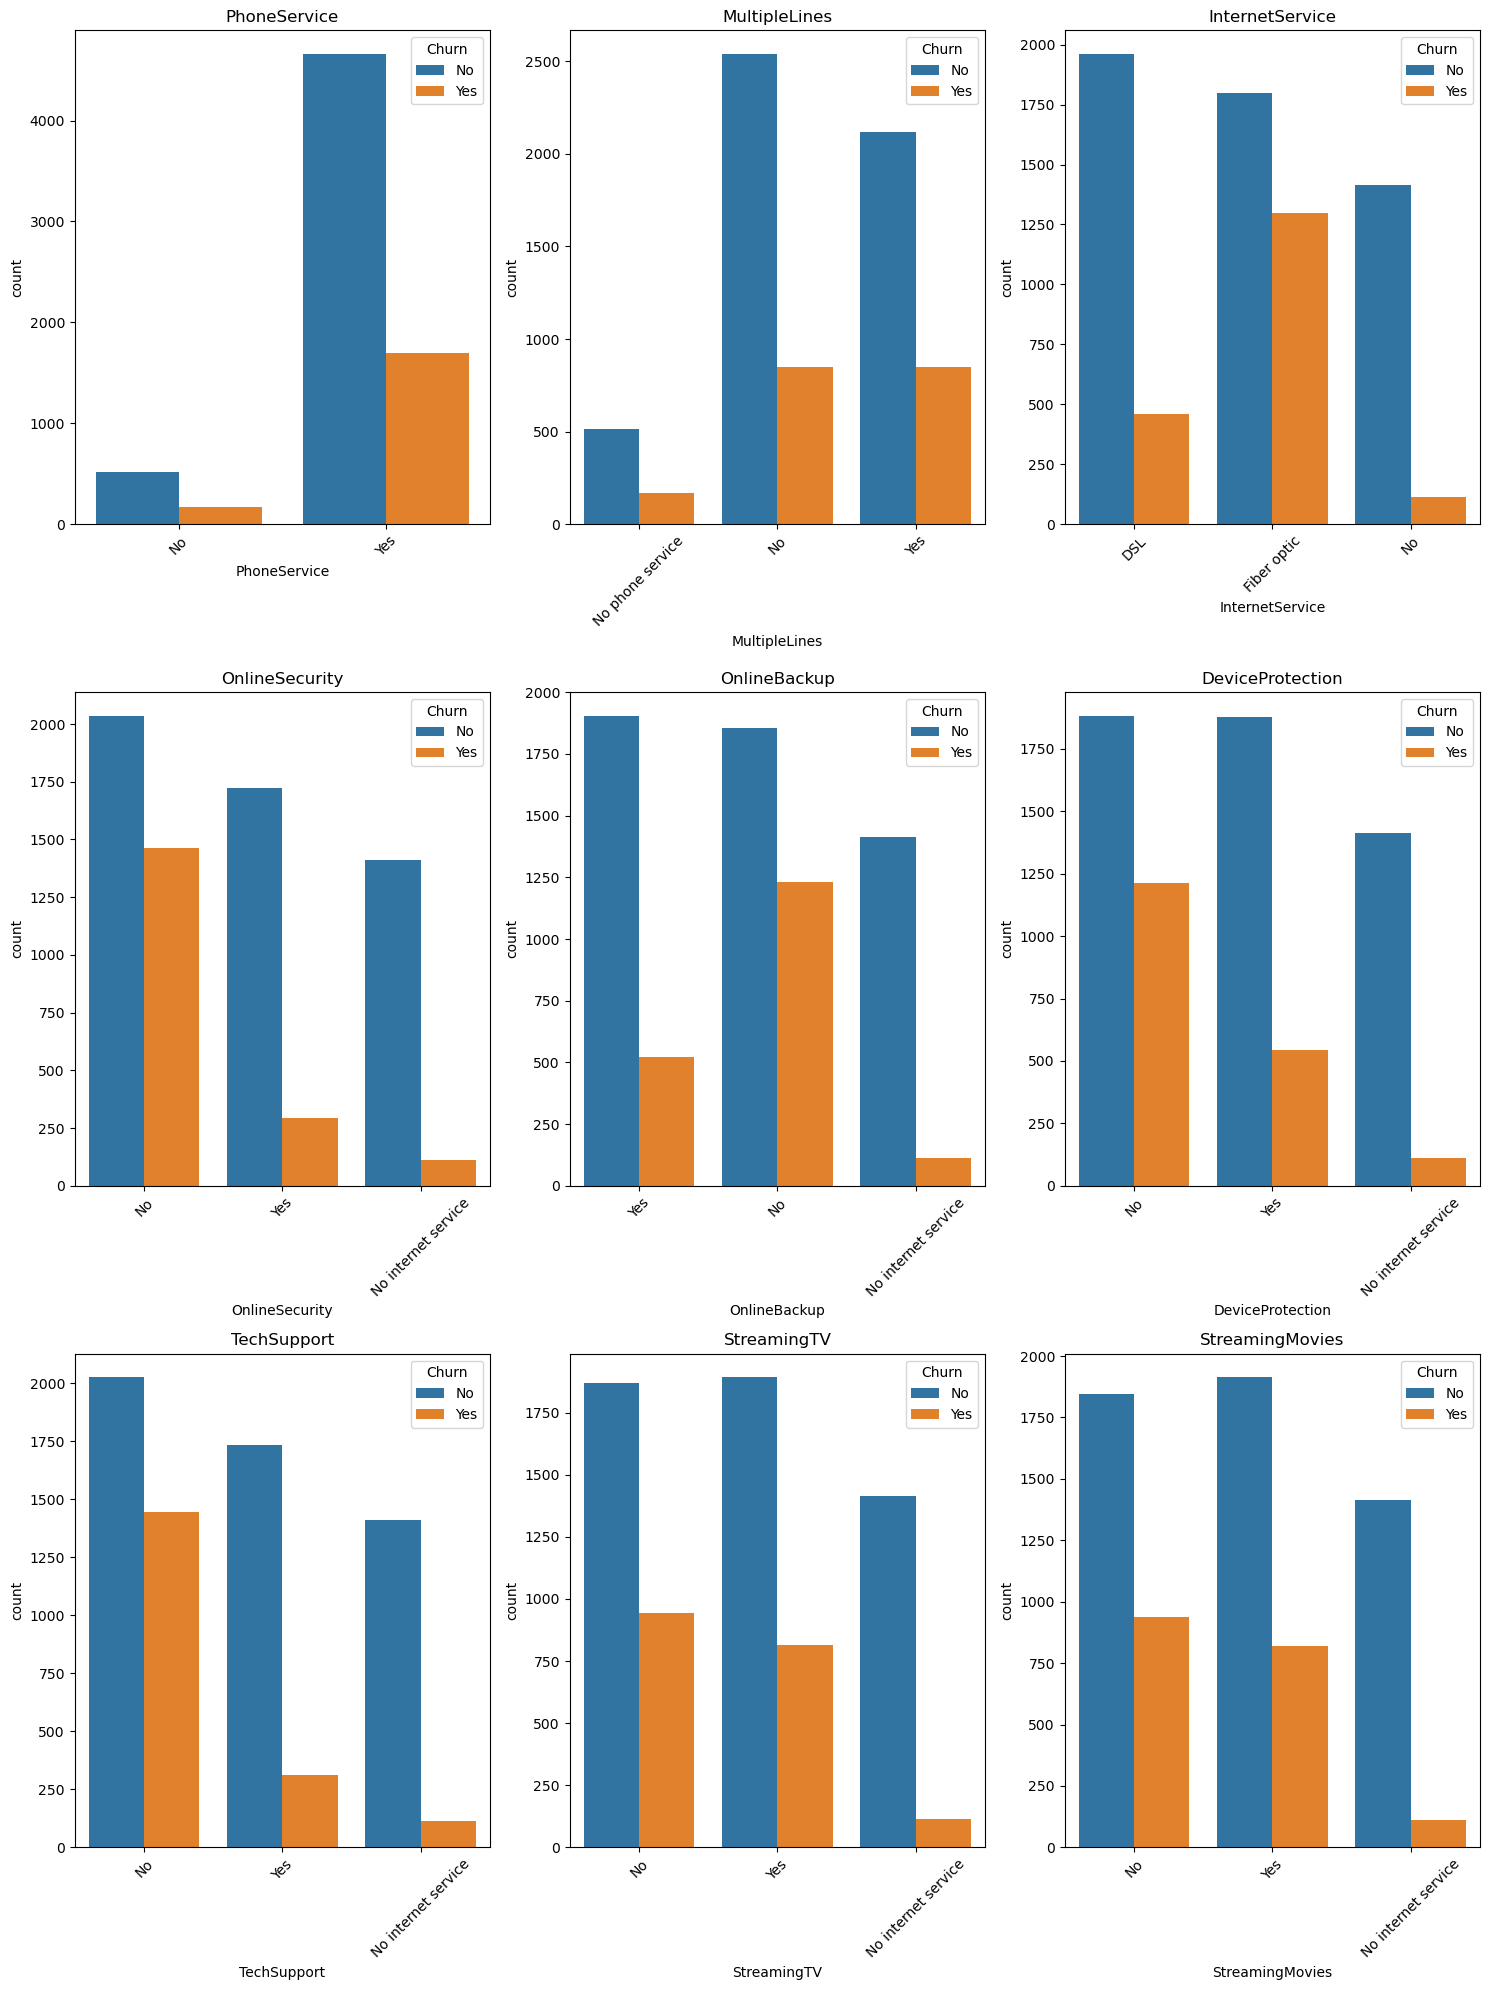

In [40]:

# List of columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots (3 rows × 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
axes = axes.flatten()  # convert 2D axes to 1D

# Loop through columns and axes
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue= df["Churn"])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#The majority of customers who do not churn tend to have services such as Phone Service and Internet Service (particularly DSL) enabled, along with Online Security. In contrast, for services like Online Banking, Tech Support, and Streaming TV, the churn rate is noticeably higher when these services are not used or are unavailable.

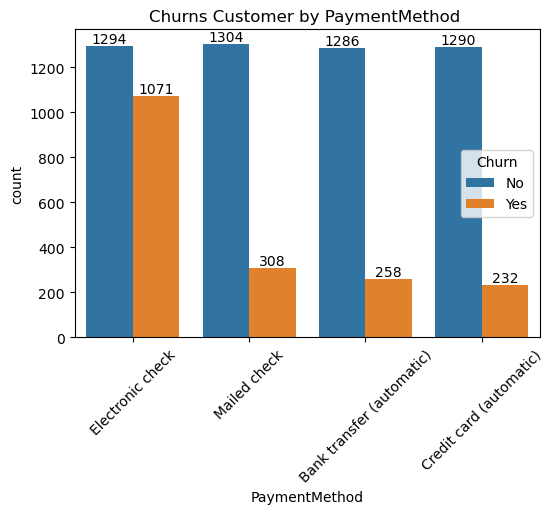

In [45]:
plt.figure(figsize=(6,4))
ax= sns.countplot(x= 'PaymentMethod', data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churns Customer by PaymentMethod ")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when ihe is using electronic check as a payment method.